In [1]:
from time import time

import pymc3 as pm
import theano
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

from bayesumis.umis_math_model import UmisMathModel
from bayesumis.umis_diagram import UmisDiagram
from testhelper.test_helper import end_timer, DbStub
from testhelper import umis_builders
from testhelper.posterior_plotters import display_parameters, print_umis_diagram

theano.config.mode = 'FAST_RUN'
theano.config.optimizer = 'fast_compile'

test_db = DbStub()

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
# (external_inflows,
#  internal_flows,
#  external_outflows,
#  stocks) = umis_builders.get_umis_diagram_basic()

(external_inflows,
 internal_flows,
 external_outflows,
 stocks,
 material_reconc_table,
 tc_obs) = umis_builders.get_umis_diagram_cycle_mat_reconc()

internal_stafs = set.union(internal_flows, stocks)

print("Building UmisDiagram...")
start_time = time()

umis_diagram = UmisDiagram(
    external_inflows,
    internal_stafs,
    external_outflows)

end_timer(start_time)

ref_material = test_db.get_material_by_num(1)
ref_time = test_db.get_time_by_num(1)

res_inflows = umis_diagram.get_external_inflows()
res_outflows = umis_diagram.get_external_outflows()
res_dict = umis_diagram.get_process_stafs_dict()

|Sp1|
|Sp2|
|M1|
|T1|
|M2|
|P1|
|P2|
|P3|
|P4|
|P5|
|P6|
|P7|
|P8|
|P9|
|P10|
|P11|
|V1|
|V2|
|V3|
|V4|
|V5|
|V6|
|V7|
|V8|
|V9|
|F1|
|F2|
|F3|
|F4|
|F5|
|F6|
|F7|
|F8|
|F9|
|F10|
|F11|
|P12|
|St1|
|P13|
|St2|
Cycle Stocked - Fri 17:02
Building UmisDiagram...
Task finished, time elapsed: 0.00017452239990234375
|M1|
|T1|


In [3]:
print_umis_diagram(res_inflows, res_dict, res_outflows)

Staf: f1Flow1, ID: F1


Process: Process3, STAFDB ID: P3
Staf: f4Flow4, ID: F4
stock: None

Process: Process5, STAFDB ID: P5
Staf: f7Flow7, ID: F7
Staf: fcycFlow11, ID: F11
Staf: f6Flow6, ID: F6
stock: None

Process: Process2, STAFDB ID: P2
Staf: f3Flow3, ID: F3
Staf: f2Flow2, ID: F2
stock: None

Process: Process7, STAFDB ID: P7
stock: Staf: s2Stock2, ID: St2

Process: Process4, STAFDB ID: P4
Staf: f5Flow5, ID: F5
stock: None

Process: Process6, STAFDB ID: P6
stock: Staf: s1Stock1, ID: St1

Process: Process13, STAFDB ID: P13
stock: None

Process: Process12, STAFDB ID: P12
stock: None

Process: Process8, STAFDB ID: P8
stock: None



Outflows
Staf: f10Flow10, ID: F10
Outflows
Staf: f8Flow8, ID: F8
Outflows
Staf: f9Flow9, ID: F9


In [4]:
print("Building math model...")
start_time = time()
math_model = UmisMathModel(
    res_inflows,
    res_dict,
    res_outflows,
    ref_material,
    ref_time,
    material_reconc_table,
    tc_obs)

end_timer(start_time)


Building math model...


/home/tom/anaconda3/envs/bayesian-umis/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/home/tom/anaconda3/envs/bayesian-umis/lib/python3.7/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
/home/tom/anaconda3/envs/bayesian-umis/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is depre

Task finished, time elapsed: 6.823621988296509


In [5]:
sample_size = 3000

print("Sampling {} times from math model".format(sample_size))
start_time = time()

with math_model.pm_model:
    trace = pm.sample(sample_size, init='advi')

end_timer(start_time)


Auto-assigning NUTS sampler...
Initializing NUTS using advi...


Sampling 3000 times from math model


  0%|          | 0/200000 [00:00<?, ?it/s]/home/tom/anaconda3/envs/bayesian-umis/lib/python3.7/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
/home/tom/anaconda3/envs/bayesian-umis/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
Average Loss = 50.267:   7%|▋         | 13337/200000 [00:25<05:28, 568.90it/s]
Convergence achieved at 13400
Interrupted at 13,399 [6%]: A

Task finished, time elapsed: 174.18329429626465


In [6]:
map_estimate = pm.find_MAP(model=math_model.pm_model)

/home/tom/.local/lib/python3.7/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
/home/tom/anaconda3/envs/bayesian-umis/lib/python3.7/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
/home/tom/anaconda3/envs/bayesian-umis/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[t

Estimates of: External Inflows

Input Flow: f1Flow1: 159.99324230856686


Estimates of: Internal Stafs

TC: f4Flow4: 1.0
Internal Staf: f4Flow4: 85.00001991548403
TC: f2Flow2: 0.700029801095125
Internal Staf: f2Flow2: 70.00002349364388
TC: f6Flow6: 0.35294113126064464
Internal Staf: f6Flow6: 30.00000318614826
TC: f5Flow5: 1.0
Internal Staf: f5Flow5: 29.995752949210413
TC: f3Flow3: 0.299970198904875
Internal Staf: f3Flow3: 29.995752949210413
TC: s2Stock2: 0.5
Internal Staf: s2Stock2: 15.000001593074128
TC: s1Stock1: 0.3333800468771237
Internal Staf: s1Stock1: 9.999985524322389
TC: fcycFlow11: 0.17647050479228976
Internal Staf: fcycFlow11: 14.99999642184015
TC: f7Flow7: 0.47058836394706555
Internal Staf: f7Flow7: 40.00002030749562


Estimates of: External Outflows

Output Flow: f10Flow10: 40.00002030749562
TC: f10Flow10: 1.0
Output Flow: f8Flow8: 19.995767424888022
TC: f8Flow8: 0.6666199531228763
Output Flow: f9Flow9: 15.000001593074128
TC: f9Flow9: 0.5




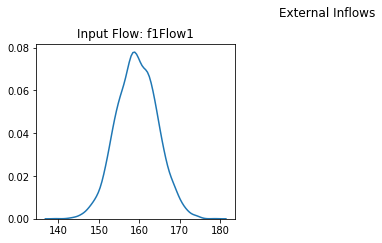

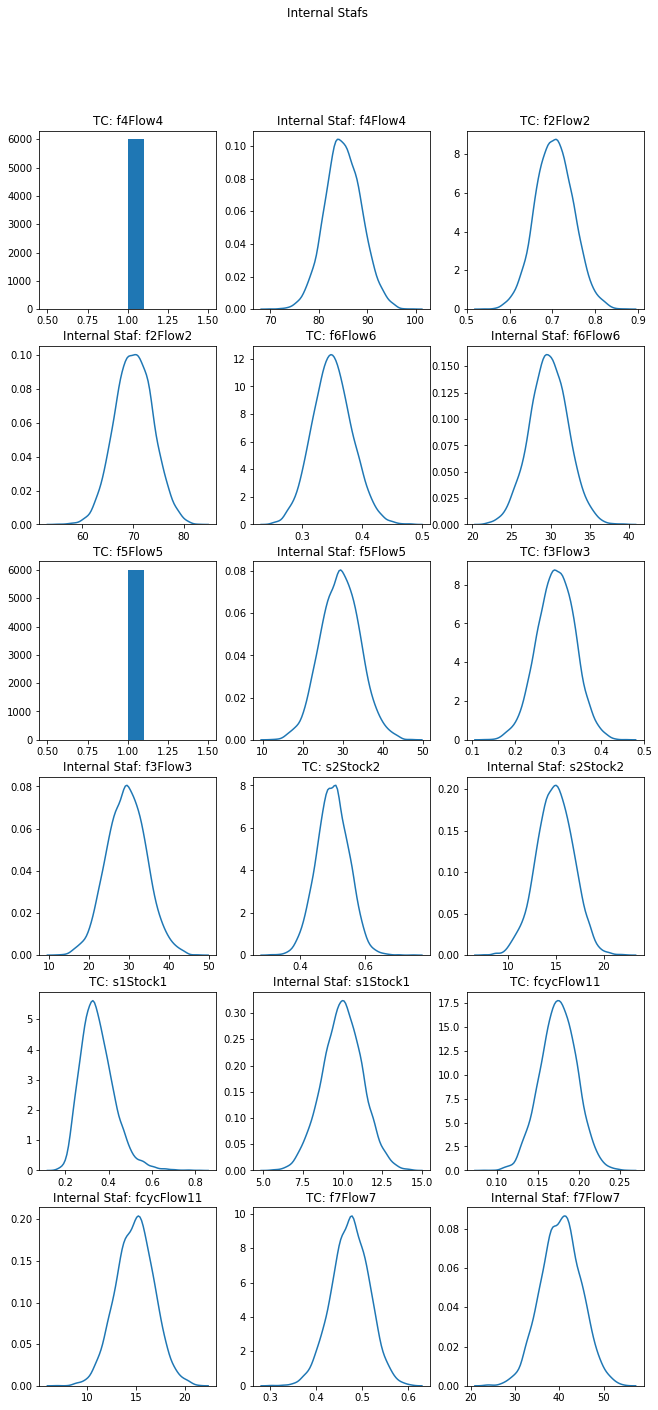

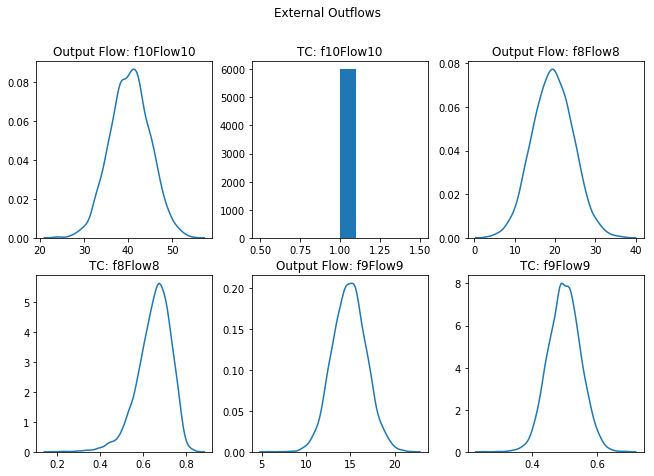

In [7]:
display_parameters(external_inflows, internal_stafs, external_outflows, trace, map_estimate, math_model)
